# This is Playground
## Can test anything you want

In [244]:
%pip install qiskit --upgrade
%pip install pennylane --upgrade
%pip install numpy --upgrade
%pip install pennylane-lightning pennylane-lightning[gpu] pennylane-sf pennylane-qiskit pennylane-cirq

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: pennylane-lightning[gpu]
Note: you may need to restart the kernel to use updated packages.


In [245]:
%pip list

Package                  Version
------------------------ -----------
anyio                    3.6.2
appdirs                  1.4.4
appnope                  0.1.3
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
asttokens                2.0.8
attrs                    20.3.0
autograd                 1.4
autoray                  0.3.2
backcall                 0.2.0
beautifulsoup4           4.11.1
bleach                   5.0.1
cachetools               5.2.0
certifi                  2022.9.24
cffi                     1.15.1
charset-normalizer       2.1.1
cirq                     1.0.0
cirq-aqt                 1.0.0
cirq-core                1.0.0
cirq-google              1.0.0
cirq-ionq                1.0.0
cirq-pasqal              1.0.0
cirq-rigetti             1.0.0
cirq-web                 1.0.0
cryptography             38.0.3
cycler                   0.11.0
Cython                   0.29.32
debugpy                  1.6.3
decorator                5.1.1
defusedxml          

# implement with qiskit 

In [246]:
from qiskit import *
from qiskit.circuit.library import C3XGate

In [247]:
#q_qubit = QuantumRegister(4,'q')
q_qubit = QuantumRegister(3,'q')
c_bit = ClassicalRegister(1,'c')

In [248]:
circuit = QuantumCircuit(q_qubit,c_bit)

In [249]:
#circuit.append(C3XGate(), [q_qubit[0], q_qubit[1], q_qubit[2], q_qubit[3]])
circuit.ccx(q_qubit[0],q_qubit[1],q_qubit[2])

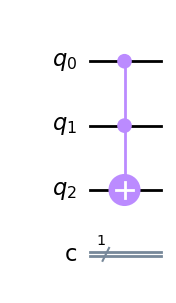

In [250]:
circuit.draw(output="mpl")

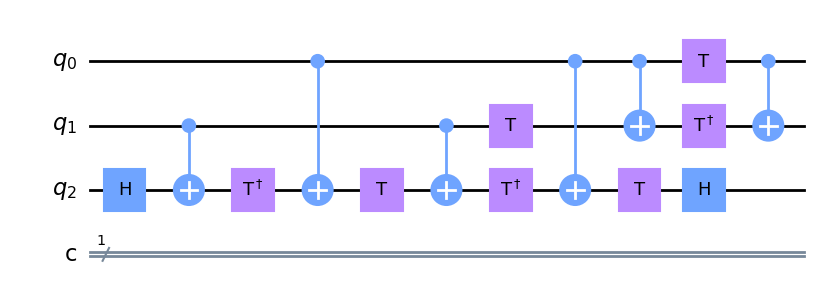

In [251]:
circuit.decompose().draw("mpl")

In [252]:
from qiskit.providers.fake_provider import FakeMontreal
from qiskit.providers.fake_provider import FakeMumbai
backend = FakeMontreal()

In [253]:
circuit_basis = transpile(circuit, backend)

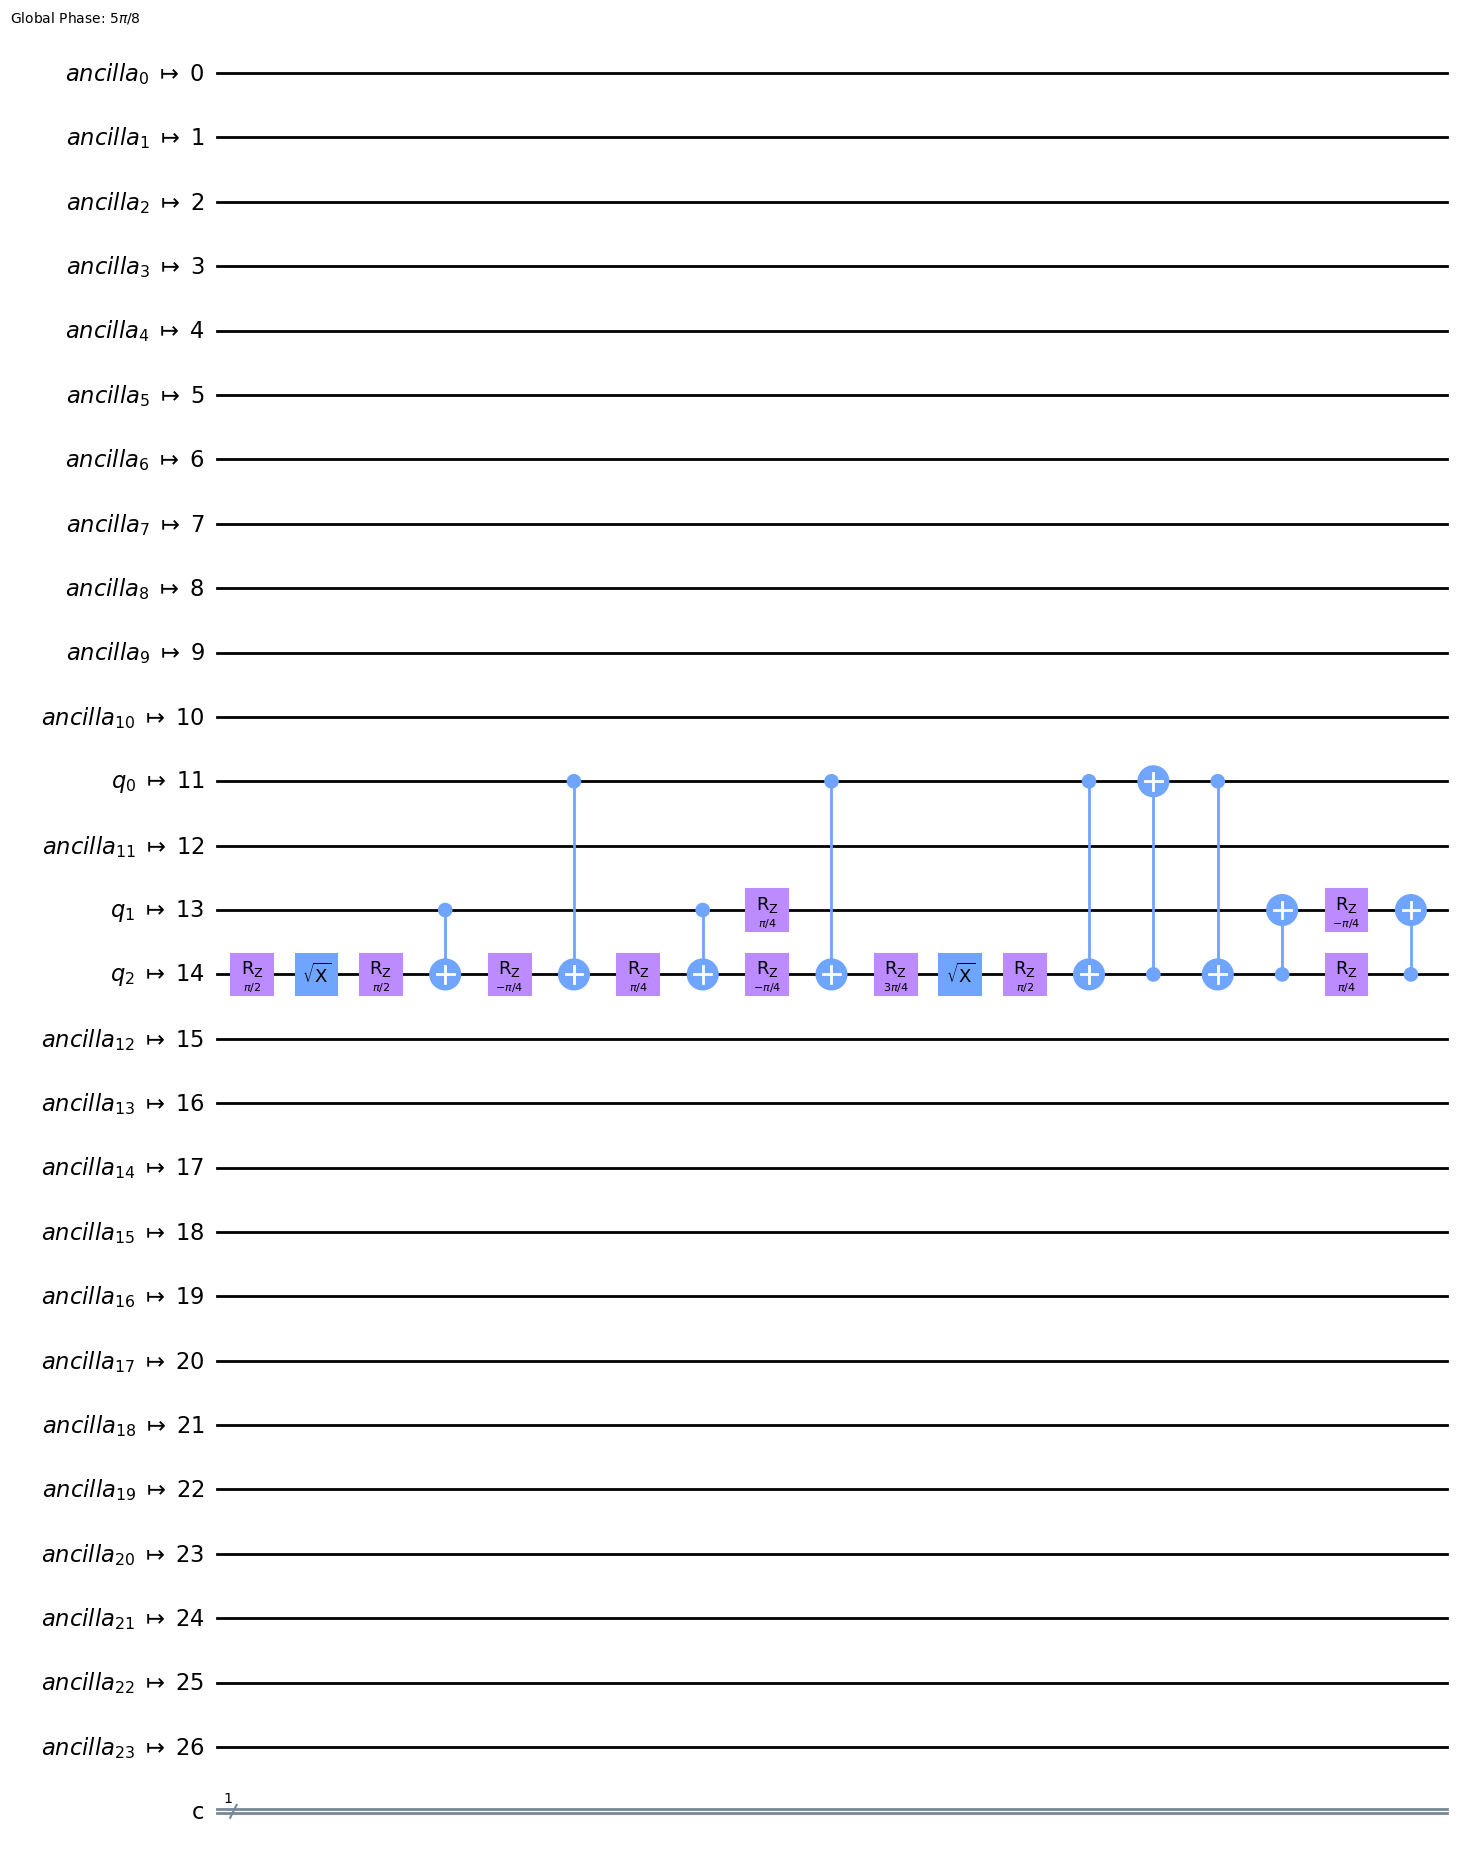

In [254]:
circuit_basis.draw("mpl")

In [255]:
backend = FakeMumbai()

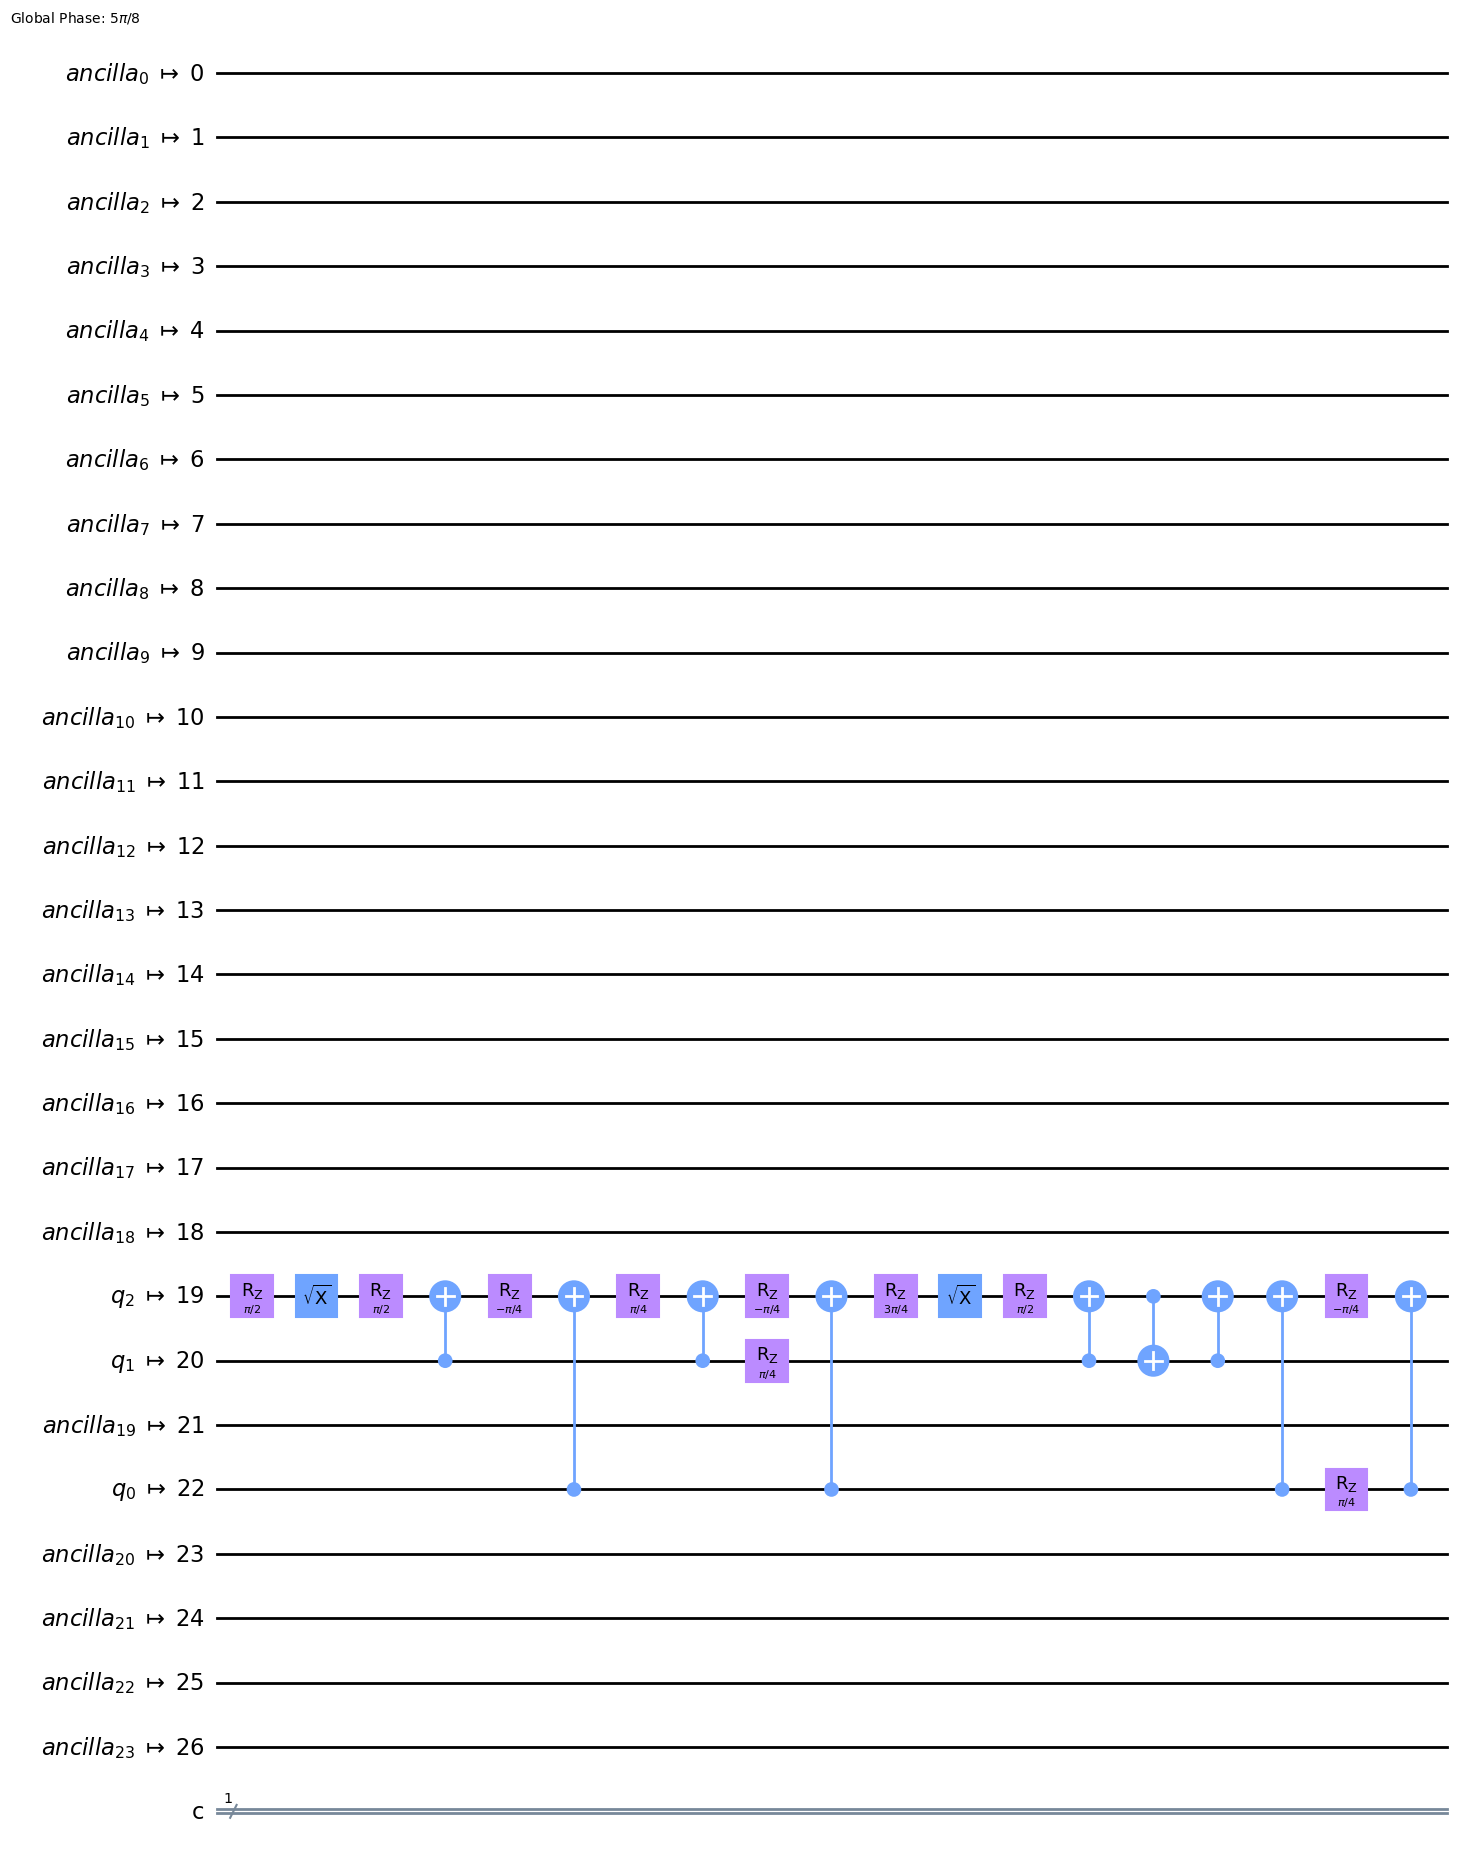

In [256]:
circuit_basis = transpile(circuits=circuit,backend=backend)
circuit_basis.draw('mpl')

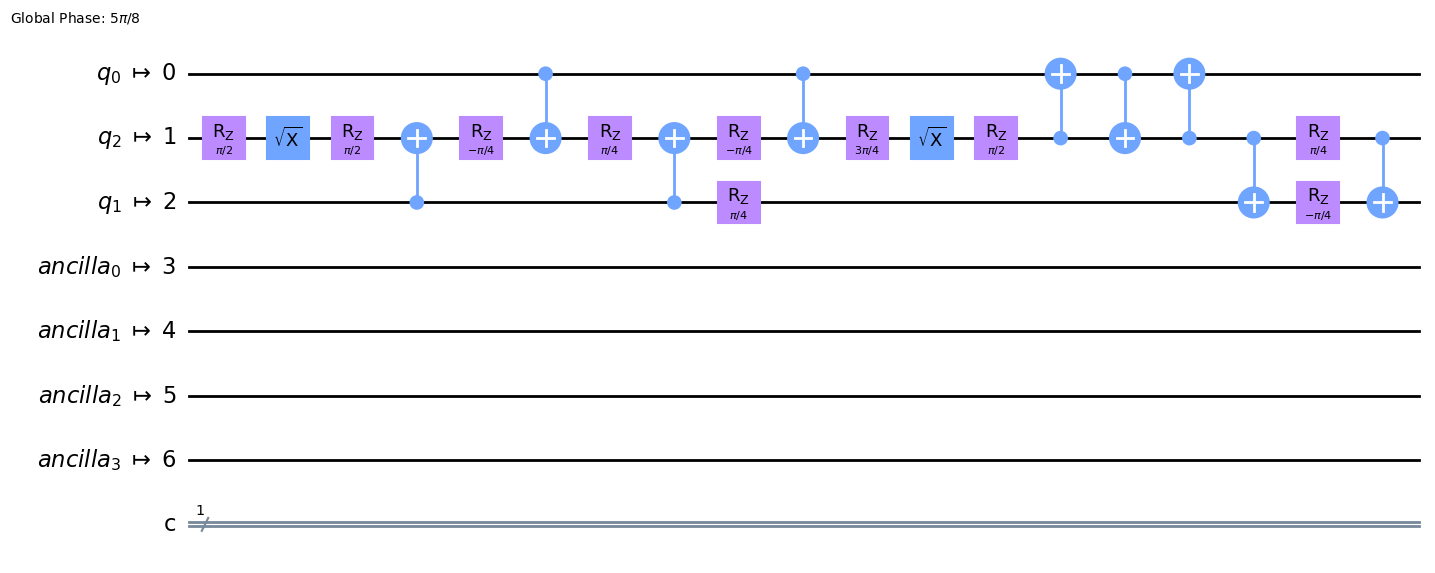

In [257]:
from qiskit.providers.fake_provider import FakeNairobi
circuit_basis = transpile(circuit, FakeNairobi())
circuit_basis.draw("mpl")

## Qubit mapping

# implement with pennylane

In [280]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [281]:
dev = qml.device('default.qubit', wires=3)

In [282]:
@qml.qnode(dev)
def circuit_1(x):
    qml.CCNOT()

In [283]:
dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])

In [284]:
def my_quantum_function(x, y):
    qml.RZ(x, wires='q1')
    qml.CNOT(wires=['aux' ,'q1'])
    qml.RY(y, wires='q2')
    return qml.expval(qml.PauliZ('q2'))

In [285]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))

params = [0.1, 0.3]

In [286]:
drawer = qml.draw(circuit)
print(drawer(params))

0: ──RY(0.10)─╭●─┤     
1: ──RY(0.30)─╰X─┤  <Z>


In [290]:
dev = qml.device("default.qubit", wires=4)
#qml.device("device_name", #wires)

#Implement quantum circuit
@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))

params = [0.1, 0.3]
#Draw quantum circuit
drawer = qml.draw(circuit, show_all_wires=True, wire_order=[2,1,0,3])
print(drawer(params))

2: ──────────────┤     
1: ──RY(0.30)─╭X─┤  <Z>
0: ──RY(0.10)─╰●─┤     
3: ──────────────┤     


In [288]:
shots_list = [5, 10, 1000]
dev = qml.device("default.qubit", wires=2, shots=shots_list)

In [264]:
@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1)), qml.expval(qml.PauliZ(0))

In [265]:
circuit(0.5)

tensor([[-0.2  ,  1.   ],
        [ 0.2  ,  1.   ],
        [-0.028,  0.872]], requires_grad=True)

In [266]:
circuit = qml.QNode(my_quantum_function, dev_unique_wires)

In [267]:
circuit(np.pi/4,0.7)

tensor(0.76484219, requires_grad=True)

In [268]:
print(qml.draw(circuit)(np.pi/4,0.7))

aux: ───────────╭●─┤     
 q1: ──RZ(0.79)─╰X─┤     
 q2: ──RY(0.70)────┤  <Z>


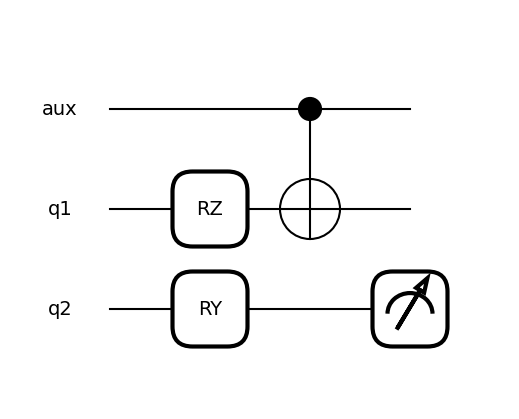

In [270]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(np.pi/4,0.7)
plt.show()

In [271]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(x):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(x, wires=1)
    return qml.expval(qml.PauliZ(1))

result = circuit(0.543)

In [299]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

dev = qml.device('default.qubit', wires=2)

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, [0])
qc.rx(theta, [0])
qc.cx(0, 1)

@qml.qnode(dev)
def quantum_circuit_with_loaded_subcircuit(x):
    qml.from_qiskit(qc)({theta: x})
    return qml.expval(qml.PauliZ(0))

angle = np.pi/2
result = quantum_circuit_with_loaded_subcircuit(angle)

In [311]:
import pennylane as qml
dev = qml.device('qiskit.aer', wires=2)

In [328]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

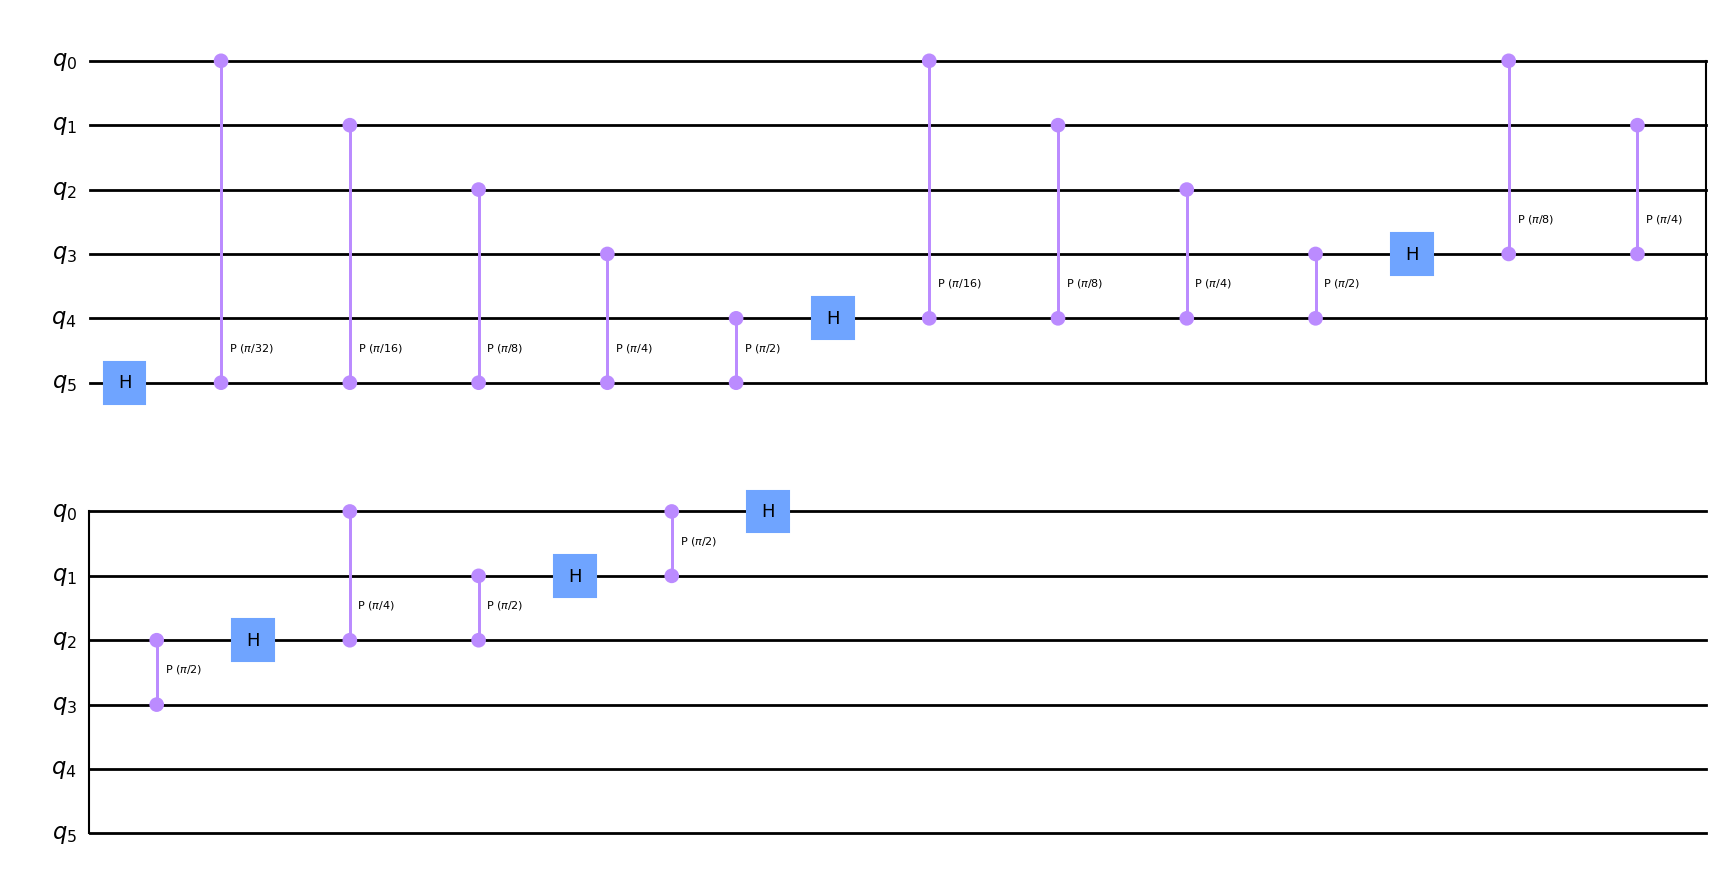

In [354]:
from numpy import pi
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(6)
qc_test = QuantumCircuit(6)
qft_rotations(qc,6)
qc.draw("mpl")

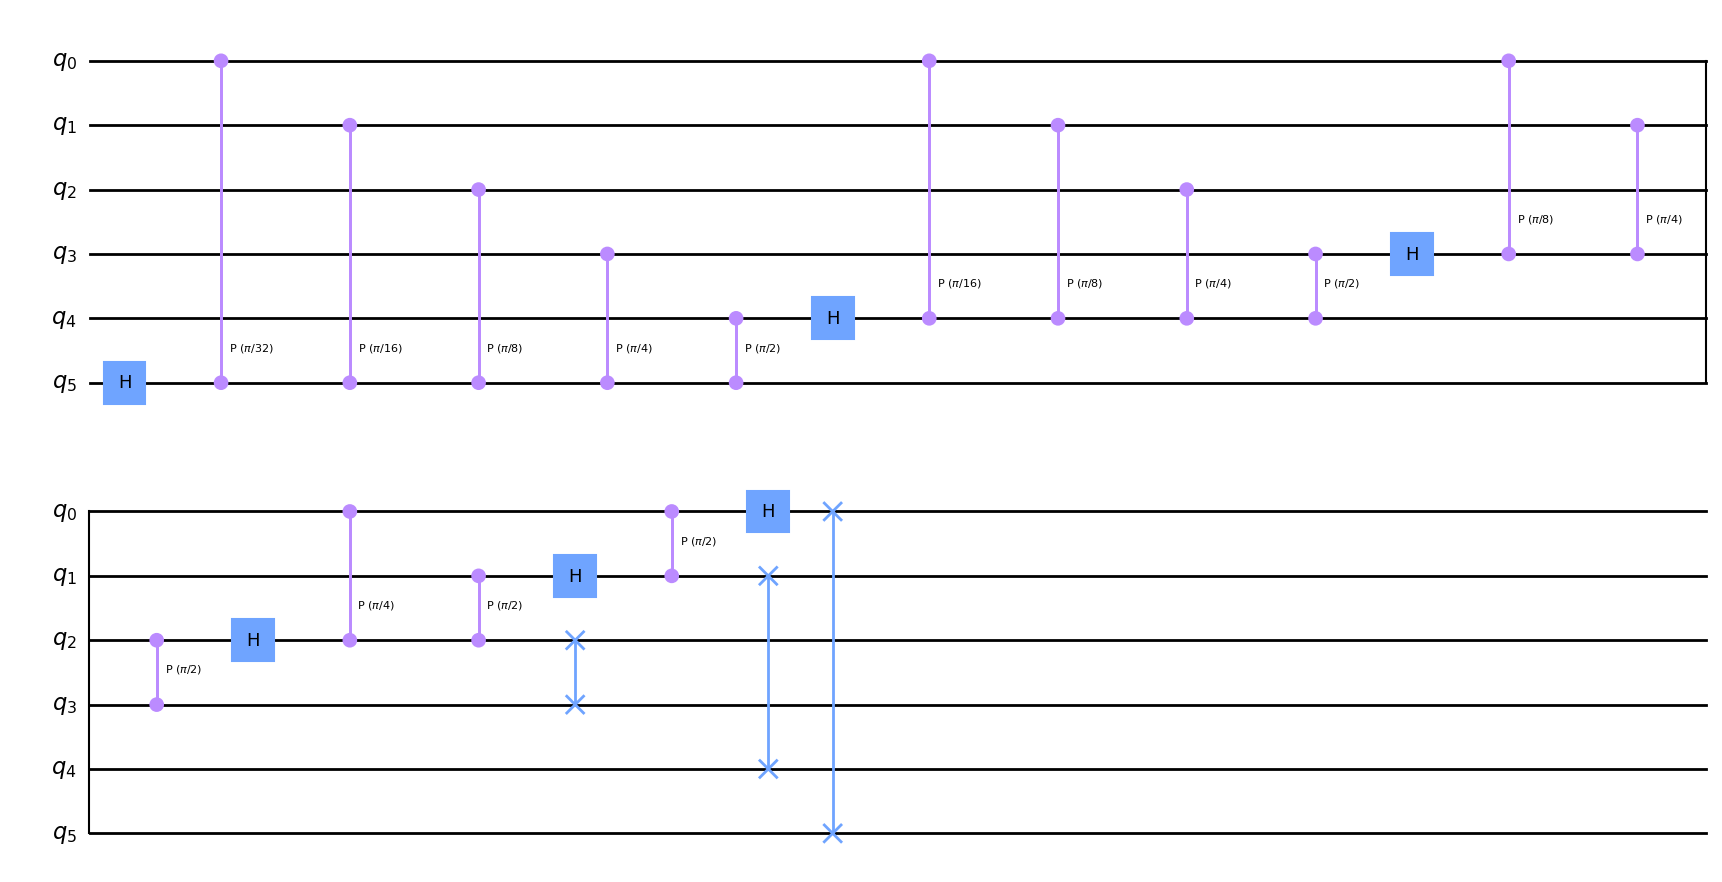

In [355]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(6)
qft(qc,6)
qc.draw("mpl")

In [356]:
qc.x(0)
qc.x(2)
qc.x(3)
qc.x(5)

qc_test.x(0)
qc_test.x(2)
qc_test.x(3)
qc_test.x(5)

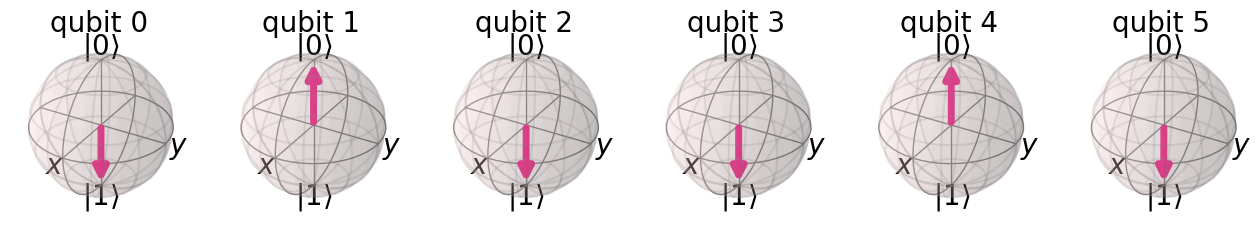

In [344]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_test_init = qc_test.copy()
qc_init.save_statevector()
qc_test_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
statevector = sim.run(qc_test_init).result().get_statevector()
plot_bloch_multivector(statevector)

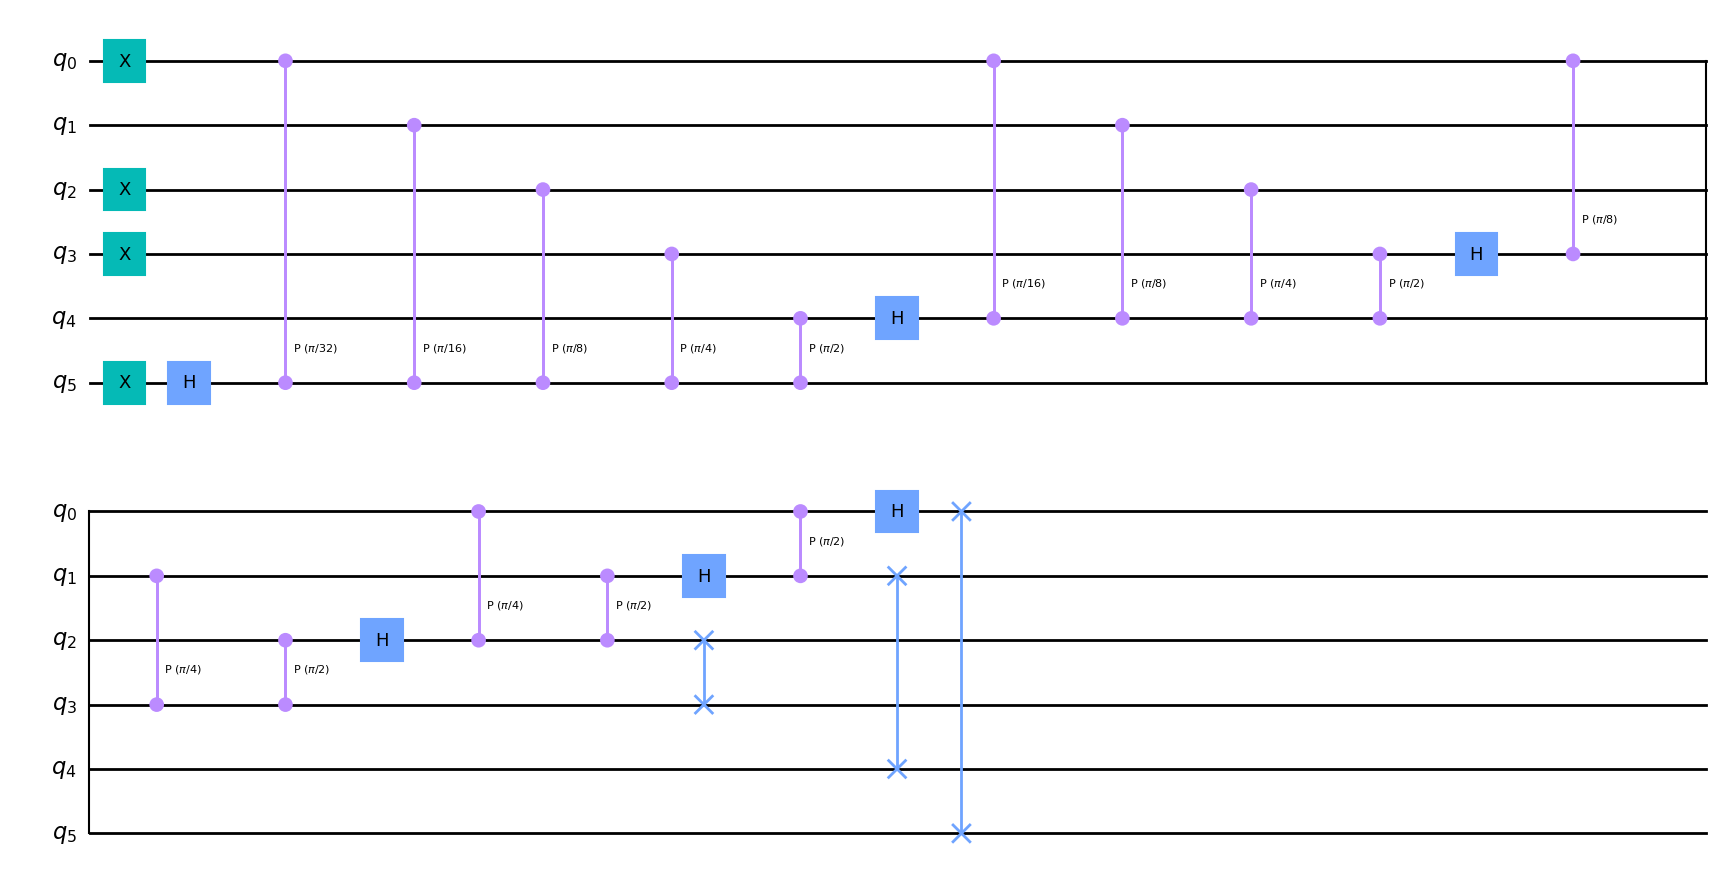

In [357]:
qft(qc, 6)
qft(qc_test, 6)
qc.draw("mpl")
qc_test.draw("mpl")

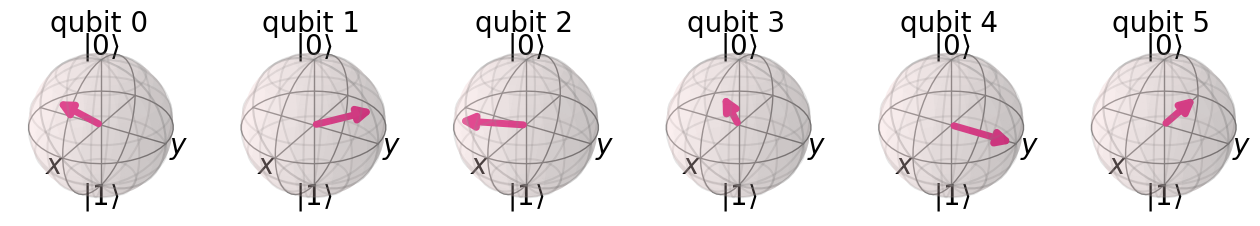

In [358]:
qc_test.save_statevector()
statevector = sim.run(qc_test).result().get_statevector()
plot_bloch_multivector(statevector)

In [359]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

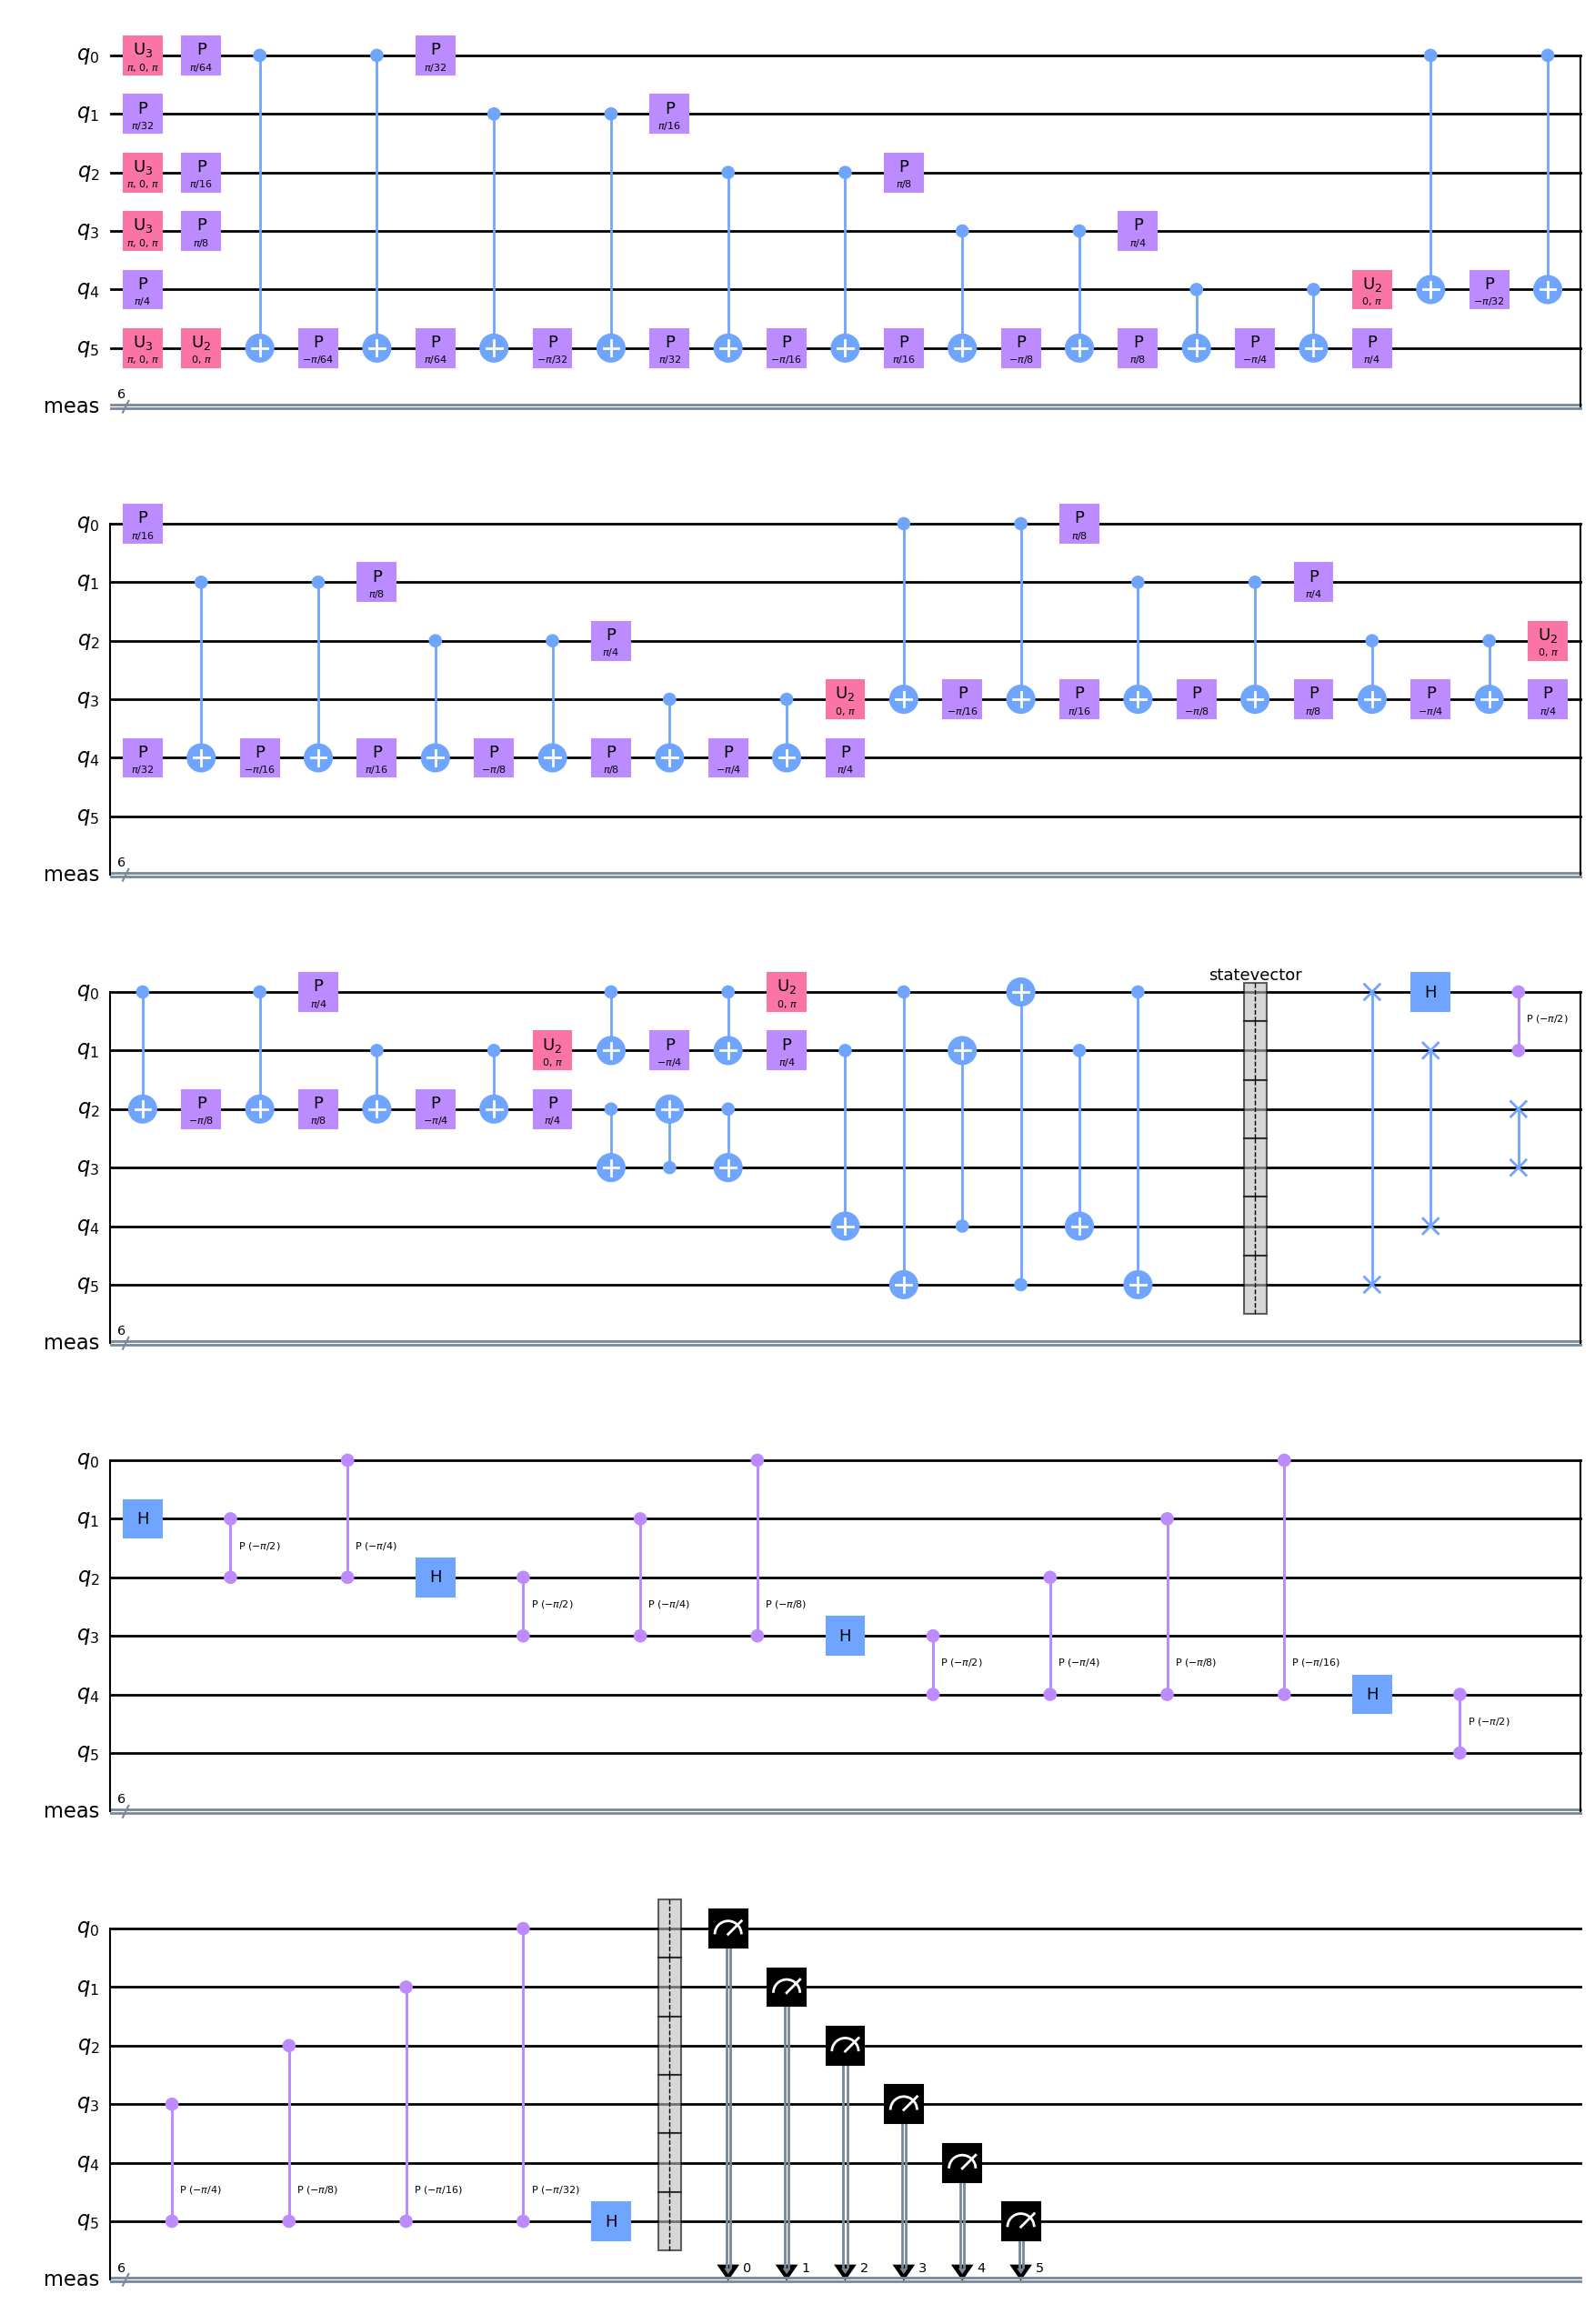

In [360]:
qc_test = inverse_qft(qc_test, 6)
qc_test.measure_all()
qc_test.draw("mpl")

In [372]:
transpiled_qc_test = transpile(qc_test,backend=FakeMontreal())
transpiled_qc_test.draw("mpl")
job = backend.run(qc_test, 2048)
job_monitor(job)

TranspilerError: "Unable to map source basis {('p', 1), ('measure', 1), ('u3', 1), ('swap', 2), ('h', 1), ('cx', 2), ('cp', 2), ('barrier', 27), ('save_statevector', 6), ('u2', 1)} to target basis {'reset', 'delay', 'sx', 'rz', 'snapshot', 'x', 'barrier', 'measure', 'id', 'cx'} over library <qiskit.circuit.equivalence.EquivalenceLibrary object at 0x11ecd0a30>."

In [370]:
counts = job.result().get_counts()
plot_histogram(counts)

NameError: name 'job' is not defined